# 基本操作

In [11]:
print('Hello World!')

Hello World!


In [12]:
an_apple = 27

In [13]:
an_example = 42

In [14]:
b = 'string'
print(b)

string


In [15]:
b?

In [16]:
print?

In [17]:
%run ipython_script_test.py

In [18]:
c

7.5

In [19]:
result

1.4666666666666666

In [20]:
# %load ipython_script_test.py
def f(x, y, z):
   return (x + y)/z
a = 5
b = 6
c = 7.5
result = f(a, b, c)

## 魔术命令

In [21]:
import numpy as np
a = np.random.randn(100, 100)

In [22]:
%timeit np.dot(a, a)

60.5 µs ± 4.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%debug?

In [24]:
%pwd

'C:\\Users\\Administrator'

In [25]:
# 魔术函数结果可以赋值
foo = %pwd
foo

'C:\\Users\\Administrator'

## 集成Matplotlib

In [26]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [27]:
%matplotlib inline

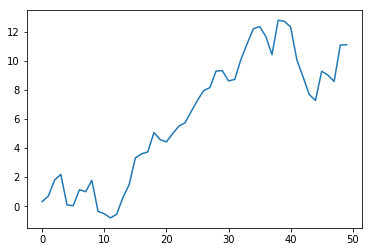

In [28]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(50).cumsum())

# Python语法基础

## 基础格式

In [29]:
# 使用缩进
for x in range(5):
    print(x)

0
1
2
3
4


In [30]:
# 分号给在同一行的语句切分
a = 5; b = 6; c = 7

## 注释

In [31]:
# 注释的用法，快捷键Ctrl+/
results = []
file_handle = ['a','b','c','foo']
for line in file_handle:
    # 空白行
    # if len(line) == 0:
    #     continue
    results.append(line.replace('foo','bar'))

In [32]:
results

['a', 'b', 'c', 'bar']

In [33]:
print("在每一行后面注释也可以的")   # 注释

在每一行后面注释也可以的


## 函数和对象方法调用

圆括号调用函数，可传递参数，或将返回值赋值
result = f(x, y, z)
result = f(a, b, c, d = 5, e = 'foo')

## 变量和参数传递

In [34]:
# 创建变量 —> 创建了一个对这个变量的引用
# 这里a和b指向同一个对象
a = [1, 2, 3]
b = a

In [35]:
# 在a中增加一个元素，b的元素也会增加
a.append(4)
b

[1, 2, 3, 4]

In [36]:
# 定义函数
def append_element(some_list, element):
    some_list.append(element)

In [37]:
# 新的局域变量some_list创建了对原始对象的引用，因此可以改变参数的值
data = [1, 2, 3]
append_element(data, 4)
data

[1, 2, 3, 4]

## 动态引用，强类型

In [38]:
# python中的对象引用不包含附属的类型
# 即声明变量时不需要说明类型，再次赋值时可以随意改变类型
a = 5
type(a)

int

In [39]:
a = 'foo'
type(a)

str

小结：实际上a不是变量，它是个引用。先创建一个integer对象，并将其绑定到a这个名称中；再创建一个新的string对象，将其重新绑定到a中。当没有任何引用关联到第一个integer对象，那么这个对象的引用计数会变成0，将触发垃圾回收机制。

In [40]:
# 这种使用方法会报错
'5' + 5

TypeError: must be str, not int

In [41]:
a = 4.5
b = 2
print('a is {0}, b is {1}'.format(type(a), type(b)))

a is <class 'float'>, b is <class 'int'>


In [42]:
a / b

2.25

小结：强类型的含义是每个对象的类型（类）是明确的

In [43]:
# 用isinstance检查对象是否为某个对象的实例
a = 5
isinstance(a, int)

True

In [44]:
# isinstance可以用类型元组，检查对象的类型是否在元组中
# 下面即检查a的类型是否是int或float中的一个
a = 5; b = 4.5
isinstance(a, (int, float))

True

In [45]:
isinstance(b,(int, float))

True

## 属性和方法

属性：其他存储在对象内部的python对象

方法：对象的附属函数（可以访问对象的内部数据）

In [46]:
# 可以用obj.attribute_name访问属性和方法
# 即  对象.属性  或   对象.方法
# 也可以用getattr函数，通过名字访问
a = 'foo'
getattr(a, 'split')

<function str.split>

## 鸭子类型

使用背景：不关心对象类型，只关心对象是否有某些方法或类型

In [47]:
# 例：可以用过验证一个对象是否遵循迭代协议，判断它是可迭代的
# 定义一个判断obj是否可迭代的函数
def isiterable(obj):
    try:
        iter(obj)   # 通过iter函数判断
        return True
    except TypeError:  # 不可迭代的
        return False

In [48]:
isiterable('a string')

True

In [49]:
isiterable([1, 2, 3])

True

In [50]:
isiterable(5)

False

In [51]:
# 当你想要你的函数能接收任意类型的序列或是迭代器时，可以使用上述函数
if not isinstance(x, list) and isiterable(x):
    x = list(x)

## 引入

In [52]:
# 模块指一个文件，该文件拓展名为.py，包含python代码，里面可以有多个变量或方法
# 编辑some_module.py
# 通过import访问模块
import some_module
result = some_module.f(5)
pi = some_module.PI

In [53]:
print(result, pi)

7 3.14159


In [54]:
# 或者from 模块名 import 函数名,变量名...
from some_module import f, g, PI
result = g(5, PI)

In [55]:
result

8.14159

In [56]:
# 使用as给引入模块起别名
import some_module as sm
from some_module import PI as pi, g as gf
r1 = sm.f(pi)
r2 = gf(6, pi)

In [57]:
r1, r2

(5.14159, 9.14159)

## 二元运算符和比较运算符

In [58]:
5 - 7

-2

In [59]:
12 + 21.5

33.5

In [60]:
5 <= 2

False

In [61]:
# is/is not方法可以用来判断两个引用是否指向同一个对象
a = [1, 2, 3]
b = a
# list会创建一个新的列表
c = list(a)
a is b

True

In [62]:
a is not c

True

In [63]:
# "=="用来比较 a 和 c指向的内存单元中的值是不是相等
a == c

True

In [64]:
a = None
a is None

True

## 可变与不可变对象

In [65]:
# 列表、字段、NumPy数组和用户定义的类型（类）都是可变的
a_list = ['foo', 2, [4, 5]]
a_list[2] = (3, 4)

In [66]:
a_list

['foo', 2, (3, 4)]

In [67]:
# 字符串和元组是不可变的
a_tuple = (3, 5, (4, 5))
a_tuple[1] = 'four'

TypeError: 'tuple' object does not support item assignment

## 数值类型

In [68]:
# int可以存储任意大的数
ival = 17239871
ival ** 6

26254519291092456596965462913230729701102721

In [69]:
# 浮点数使用float，双精度（64位）的值，也可以用科学计数法表示
fval = 7.243
fval2 = 6.78e-5

In [70]:
# 不能得到整数的除法会得到浮点数
3 / 2

1.5

In [71]:
# 若要去掉小数部分，使用//
3 // 2

1

## 字符串

In [72]:
# 单引号双引号都可以
a = 'one way'
b = "another way"

In [73]:
a, b

('one way', 'another way')

In [74]:
# 有换行符的字符串使用三引号，'''或者"""
c = """
long string
with multiple lines
"""

In [75]:
# 实际上包含四行，"""和lines后面的换行符
# count计算新的行
c.count('\n')

3

In [76]:
# 字符串是不可变的，不能修改字符串
a = 'this is a string'
a[10] = f

TypeError: 'str' object does not support item assignment

In [77]:
a

'this is a string'

In [78]:
# 很多对象可以使用str函数转化为字符串
a = 5.6
s = str(a)
print(s)

5.6


In [79]:
# 字符串是一个序列的Unicode字符，可以像列表和元组一样处理
s = 'python'
list(s)

['p', 'y', 't', 'h', 'o', 'n']

In [80]:
# 切片操作
s[:3]

'pyt'

In [81]:
# 反斜杠表示转义字符，如换行符或Unicode字符
s = '12\\34'
print(s)

12\34


In [82]:
# 若字符串包含很多反斜杠，但没有特殊字符，则可以在字符串前面加r，表名字符就是它自身，r表示raw
s = r'this\has\no\special\characters'
s

'this\\has\\no\\special\\characters'

In [83]:
# 两个字符串可使用 + 合并
a = 'the first half '
b = 'and the second half'
a + b

'the first half and the second half'

In [84]:
# format方法替换格式化的参数为字符串，产生一个新的字符串
# {0:.2f}表示格式化第一个参数为带两位小数的浮点数
# {1:s}表示格式化第二个参数为字符串
# {2:d}表示格式化第三个参数为一个整数
template = '{0:.2f} {1:s} are worth US${2:d}'
template.format(4.5560, 'Argentine Pesos', 1)

'4.56 Argentine Pesos are worth US$1'

## 字节和Unicode

In [85]:
val = "españo"

In [86]:
val

'españo'

In [87]:
# 用encode将字符串编码为UTF-8
val_utf8 = val.encode('utf-8')
val_utf8

b'espa\xc3\xb1o'

In [89]:
type(val_utf8)

bytes

In [90]:
# decode方法用于解码
val_utf8.decode('utf-8')

'españo'

In [92]:
val.encode('latin1')

b'espa\xf1o'

In [93]:
val.encode('utf-16')

b'\xff\xfee\x00s\x00p\x00a\x00\xf1\x00o\x00'

In [95]:
val.encode('utf-16le')

b'e\x00s\x00p\x00a\x00\xf1\x00o\x00'

In [96]:
# 可以在字节文本前加上b
bytes_val = b'this is bytes'
bytes_val

b'this is bytes'

In [98]:
decoded = bytes_val.decode('utf8')

In [100]:
decoded  # 现在是str(Unicode)

'this is bytes'

## 布尔值

In [101]:
# 布尔值True/False,可以同and和or结合使用
True and True

True

In [102]:
False or True

True

## 类型转换

In [103]:
# str/bool/int/float也是函数，可以用来转换类型
s = '3.14159'
fval = float(s)

In [104]:
type(fval)

float

In [105]:
int(fval)

3

In [106]:
bool(fval)

True

In [107]:
bool(0)

False

## None

In [108]:
# None是空值类型，如果函数没有明确的返回值，默认返回None
a = None

In [109]:
a is None

True

In [110]:
b = 5

In [111]:
b is not None

True

In [112]:
# None也能作为函数的默认参数
def add_and_maybe_multiply(a, b, c=None):
    result = a + b
    if c is not None:
        result = result * c
    return result

In [113]:
# None是保留字，且是唯一的NoneType的实例
type(None)

NoneType

## 日期和时间

In [114]:
# Python内建了datetime模块，提供datetime、date和time类型
from datetime import datetime, date, time

In [115]:
dt = datetime(2011, 10, 29, 20, 20, 11)

In [116]:
# 返回日
dt.day

29

In [117]:
# 返回时
dt.minute

20

In [118]:
# 可以根据datetime实例，用date和time提取出各自的对象
dt.date()

datetime.date(2011, 10, 29)

In [119]:
dt.time()

datetime.time(20, 20, 11)

In [120]:
# strftime可将datetime格式化为字符串
dt.strftime('%m/%d/%Y %H:%M')

'10/29/2011 20:20'

In [121]:
# strptime可将字符串转化成datetime对象
datetime.strptime('20091031', '%Y%m%d')

datetime.datetime(2009, 10, 31, 0, 0)

In [122]:
# 当聚类或对时间序列进行分组时，可替换datetimes的time字段
# 下例用0替换分和秒
# datetime.datetime是不可变类型，该方法会产生新的对象
dt.replace(minute = 0, second = 0)

datetime.datetime(2011, 10, 29, 20, 0)

In [123]:
# 两个datetime对象的差会产生一个datetime.timedelta类型
dt2 = datetime(2011, 11, 15, 22, 23)

In [124]:
delta = dt2 - dt

In [125]:
delta

datetime.timedelta(17, 7369)

In [126]:
type(delta)

datetime.timedelta

In [127]:
# 将timedelta添加到datetime会产生一个新的偏移datetime
dt

datetime.datetime(2011, 10, 29, 20, 20, 11)

In [130]:
dt = datetime(2011, 10, 29, 20, 20, 11)

In [131]:
dt + delta

datetime.datetime(2011, 11, 15, 22, 23)

## 控制流

### if、elif和else

In [133]:
x = -1
if x < 0:
    print("It's negative")

It's negative


In [134]:
# 多个条件分支的情况，如果某个条件为True，后面的elif就不会被执行
x = 0
if x < 0:
    print("It's negative")
elif x == 0:
    print("Equal to zero")
elif 0 < x < 5:
    print("Positive but smaller than 5")
else:
    print("Positive and larger than or equal to 5")

Equal to zero


In [135]:
a = 5; b = 7

In [136]:
c = 8; d = 4

In [137]:
# 这里因为a<b为True，所以c>d不会被执行
if a < b or c > d:
    print('Made it')

Made it


In [138]:
# 可以把比较式串在一起
4 > 3 > 2 > 1

True

### for循环

In [ ]:
# 语法示例
for value in collection:
    # do something with value

In [139]:
# continue 跳过剩下的部分进入下一个循环
# 下例为将列表中的整数相加，跳过None：
sequence = [1, 2, None, 4, None, 5]
total = 0
for value in sequence:
    if value is None:
        continue;
    total += value

In [140]:
total

12

In [141]:
# break直接跳出循环
sequence = [1, 2, 0, 4, 6, 5, 2, 1]
total_until_5 = 0
for value in sequence:
    if value == 5:
        break;
    total_until_5 += value

In [142]:
total_until_5

13

In [143]:
# break只中断for循环的最内层，其余的for循环仍会运行
for i in range(4):
    for j in range(4):
        if j > i:
            break;
        print((i, j))

(0, 0)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


In [ ]:
# 可用for循环将集合或迭代器中的元素拆分成变量
for a, b, c in iterator:
    # do something

### While循环

In [144]:
# 指定了条件和代码，当条件为False退出循环，break也能退出
x = 256
total = 0
while x > 0:
    if total > 500:
        break
    total += x
    x = x // 2

In [145]:
total, x

(504, 4)

In [146]:
# pass是非操作语句，作为未执行代码的占位符
if x < 0:
    print('negative!')
elif x == 0:
    pass
else:
    print('positive!')

positive!


### range

In [147]:
# range函数返回一个迭代器，产生一个均匀分布的整数序列
range(10)

range(0, 10)

In [148]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [149]:
# range的三个参数是（起点，终点，步进）
list(range(0, 20, 2))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [150]:
# range产生的整数不包括终点
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [153]:
# range常见用法是用序号迭代序列
# 可以用list来存储range在其他数据结构中生成的所有整数
seq = [1, 2, 3, 4]
for i in range(len(seq)):
    val = seq[i]
    print(val)

1
2
3
4


In [154]:
# 对0到99999中3或5的倍数求和
sum = 0
for i in range(100000):
    # % 是取余
    if i % 3 == 0 or i % 5 == 0:
        sum += i
print(sum)

2333316668


### 三元表达式

In [ ]:
# 三元表达式可将if-else语句放到一行
value = true-expr if condition else false-expr

In [ ]:
# 上述等同于：
if condition:
    value = true-expr
else:
    value = false-expr

In [155]:
# 只有一个表达式会被执行
# 三元表达式中的if和else可以包含大量计算，但只有True的分支会执行
x = 5

In [156]:
'Non-negative' if x >= 0 else 'Negative'

'Non-negative'